<a href="https://colab.research.google.com/github/BrouthenKamel/Machine_Learning_Project/blob/main/Heart_Attack_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
dataset = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [3]:
dataset

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [4]:
chest_pain = { 1:'typical angina' , 2:'atypical angina' , 3:'non-anginal pain' , 4:'asymptomatic' }
ecg = { 0:'normal' , 1:'ST-T wave abnormality' , 2:'left ventricular hypertrophy' }
slope = { 1:'upsloping' , 2:'flat' , 3:'downsloping' }
dataset = dataset.replace( { "chest pain type" : chest_pain , "resting ecg" : ecg , "ST slope" : slope } )
dataset

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,0,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,1,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,0,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,1,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,typical angina,110,264,0,normal,132,0,1.2,flat,1
1186,68,1,asymptomatic,144,193,1,normal,141,0,3.4,flat,1
1187,57,1,asymptomatic,130,131,0,normal,115,1,1.2,flat,1
1188,57,0,atypical angina,130,236,0,left ventricular hypertrophy,174,0,0.0,flat,1


In [5]:
dataset.rename( columns = { 'target' : 'heart attack' } , inplace= True )

In [6]:
dataset.describe()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,heart attack
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,132.153782,210.363866,0.213445,139.732773,0.387395,0.922773,0.528571
std,9.358203,0.424884,18.368823,101.420489,0.409912,25.517636,0.487360,1.086337,0.499393
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,229.000000,0.000000,140.500000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,269.750000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [7]:
dataset.rename( columns = { "resting bp s" : "resting bps" } , inplace = True )
dataset.drop( dataset[ dataset["resting bps"] == 0 ].index , inplace = True )
dataset["resting bps"].sort_values()

315      80
228      92
834      94
694      94
1018     94
       ... 
242     200
734     200
366     200
1013    200
400     200
Name: resting bps, Length: 1189, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcce135e490>,
      dtype=object)

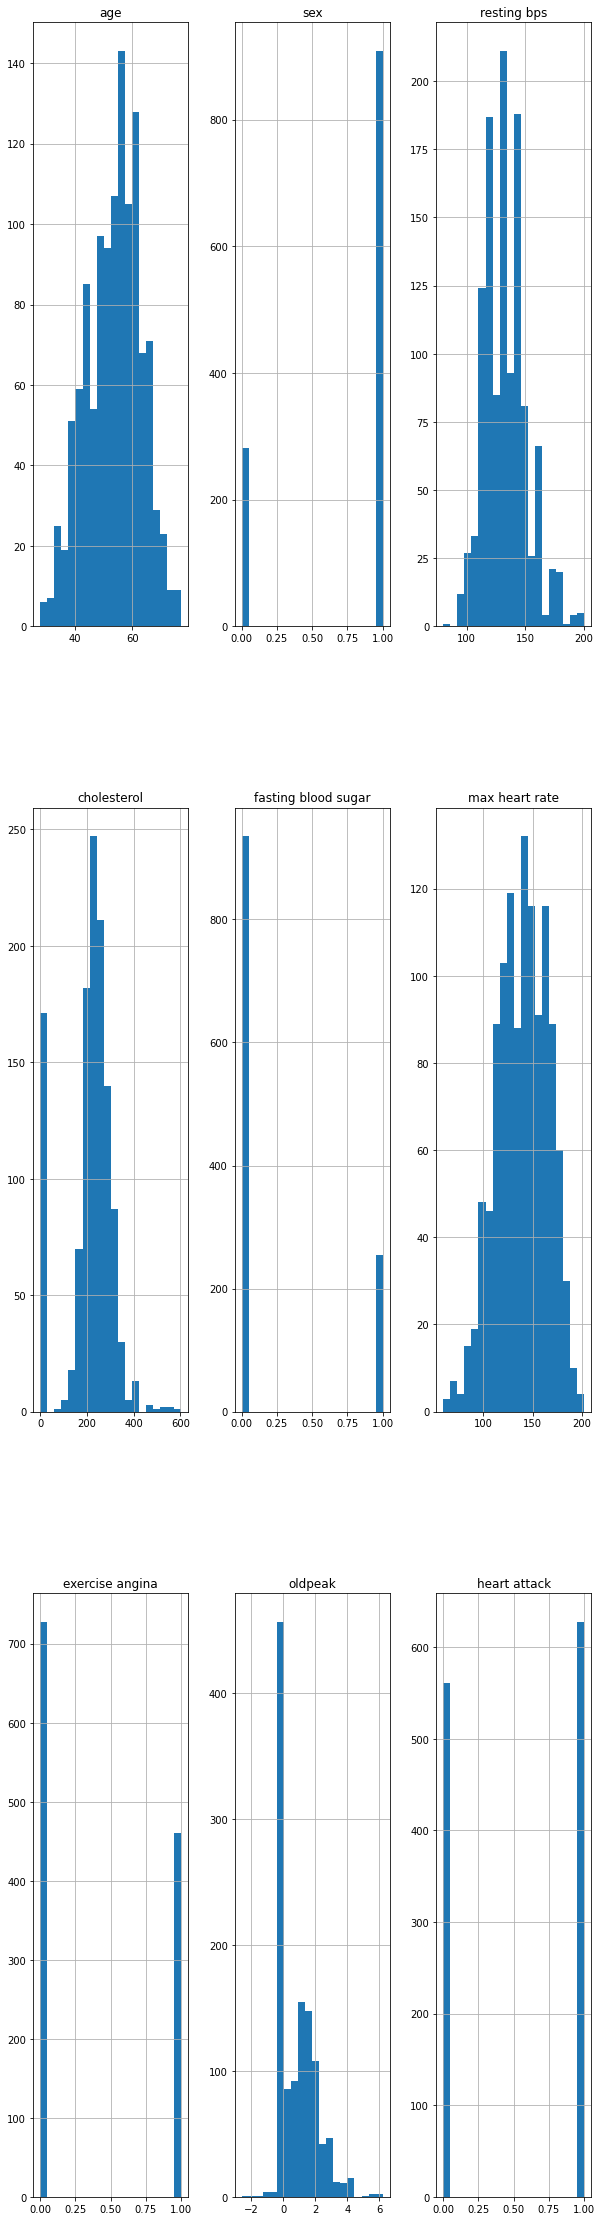

In [8]:
dataset.hist( bins = 20 , figsize = (10,40))

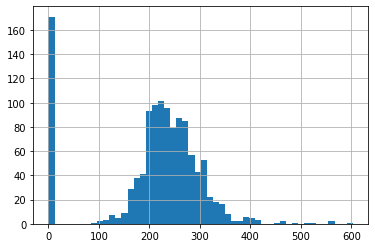

In [9]:
dataset["cholesterol"].hist(bins=50)

In [10]:
dataset.drop( dataset[ dataset['cholesterol'] == 0 ].index , inplace = True )
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1018 non-null   int64  
 1   sex                  1018 non-null   int64  
 2   chest pain type      1018 non-null   object 
 3   resting bps          1018 non-null   int64  
 4   cholesterol          1018 non-null   int64  
 5   fasting blood sugar  1018 non-null   int64  
 6   resting ecg          1018 non-null   object 
 7   max heart rate       1018 non-null   int64  
 8   exercise angina      1018 non-null   int64  
 9   oldpeak              1018 non-null   float64
 10  ST slope             1018 non-null   object 
 11  heart attack         1018 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 103.4+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccdcf54d90>,
      dtype=object)

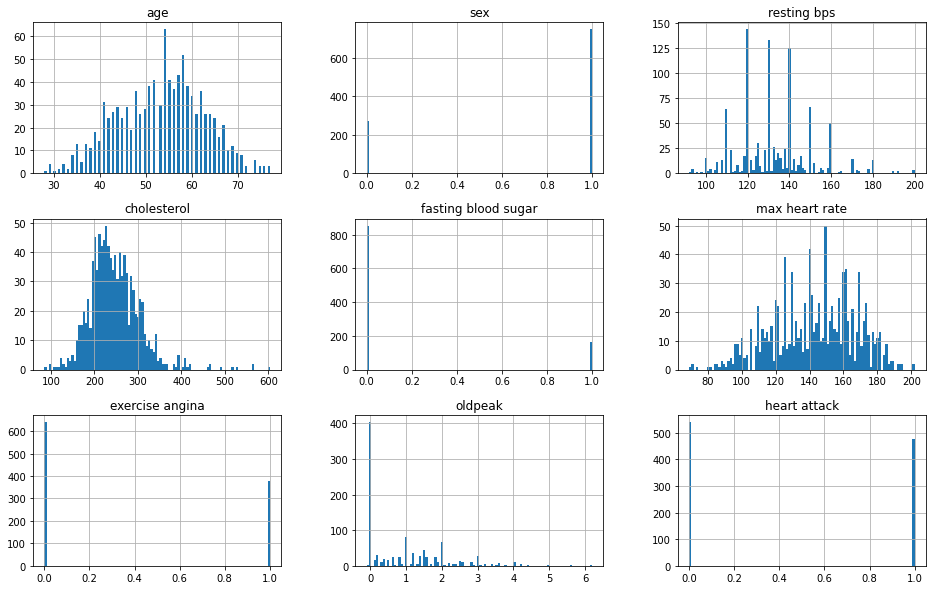

In [13]:
dataset.hist( bins = 100 , figsize=(16,10))

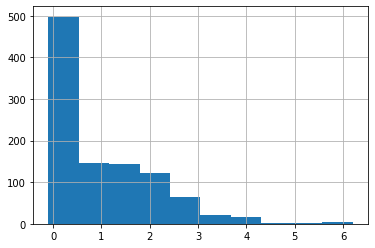

In [16]:
dataset['oldpeak'].hist()

In [17]:
dataset

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,heart attack
0,40,1,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,0,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,1,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,0,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,1,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,typical angina,110,264,0,normal,132,0,1.2,flat,1
1186,68,1,asymptomatic,144,193,1,normal,141,0,3.4,flat,1
1187,57,1,asymptomatic,130,131,0,normal,115,1,1.2,flat,1
1188,57,0,atypical angina,130,236,0,left ventricular hypertrophy,174,0,0.0,flat,1


In [27]:
categorical = ['chest pain type' , 'resting ecg' , 'ST slope']
binary = ['sex' , 'fasting blood sugar' , 'exercise angina' ]
numerical = ['age' , 'resting bps' , 'cholesterol', 'max heart rate' ]

In [20]:
dataset.corr()['heart attack']

age                    0.274112
sex                    0.296594
resting bps            0.171239
cholesterol            0.105813
fasting blood sugar    0.115842
max heart rate        -0.387733
exercise angina        0.519148
oldpeak                0.470201
heart attack           1.000000
Name: heart attack, dtype: float64

In [24]:
dataset = pd.get_dummies( dataset , columns = categorical )


In [25]:
dataset

,age,sex,resting bps,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,heart attack,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,chest pain type_typical angina,resting ecg_ST-T wave abnormality,resting ecg_left ventricular hypertrophy,resting ecg_normal,ST slope_0,ST slope_downsloping,ST slope_flat,ST slope_upsloping
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,1,0,0,0,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,0,1,0,0,1,0
1186,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,0,1,0,0,1,0
1187,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,0,1,0,0,1,0
1188,57,0,130,236,0,174,0,0.0,1,0,1,0,0,0,1,0,0,0,1,0


In [26]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform( dataset[numerical] )
scaled_features.shape

(1018, 4)

**Standardization**

In [35]:
for i,j in zip(numerical , range(scaled_features.shape[1] ) ):
  dataset[i] = scaled_features[:,j]
dataset

,age,sex,resting bps,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,heart attack,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,chest pain type_typical angina,resting ecg_ST-T wave abnormality,resting ecg_left ventricular hypertrophy,resting ecg_normal,ST slope_0,ST slope_downsloping,ST slope_flat,ST slope_upsloping
0,-1.412704,1,0.425872,0.753163,0,1.194669,0,0.0,0,0,1,0,0,0,0,1,0,0,0,1
1,-0.456357,0,1.572492,-1.151883,0,0.541603,0,1.0,1,0,0,1,0,0,0,1,0,0,1,0
2,-1.731486,1,-0.147439,0.648298,0,-1.825764,0,0.0,0,0,1,0,0,1,0,0,0,0,0,1
3,-0.562618,0,0.311210,-0.557648,0,-1.417597,1,1.5,1,1,0,0,0,0,0,1,0,0,1,0
4,0.074946,1,0.999182,-0.889721,0,-0.846164,0,0.0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,-0.881400,1,-1.294059,0.316226,0,-0.437997,0,1.2,1,0,0,0,1,0,0,1,0,0,1,0
1186,1.562596,1,0.655196,-0.924676,1,-0.070647,0,3.4,1,1,0,0,0,0,0,1,0,0,1,0
1187,0.393728,1,-0.147439,-2.008280,0,-1.131881,1,1.2,1,1,0,0,0,0,0,1,0,0,1,0
1188,0.393728,0,-0.147439,-0.173144,0,1.276303,0,0.0,1,0,1,0,0,0,1,0,0,0,1,0


In [36]:
from sklearn.model_selection import train_test_split

In [39]:
x = dataset.drop( columns=['heart attack'] )
y = dataset['heart attack']

In [40]:
x

,age,sex,resting bps,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,chest pain type_typical angina,resting ecg_ST-T wave abnormality,resting ecg_left ventricular hypertrophy,resting ecg_normal,ST slope_0,ST slope_downsloping,ST slope_flat,ST slope_upsloping
0,-1.412704,1,0.425872,0.753163,0,1.194669,0,0.0,0,1,0,0,0,0,1,0,0,0,1
1,-0.456357,0,1.572492,-1.151883,0,0.541603,0,1.0,0,0,1,0,0,0,1,0,0,1,0
2,-1.731486,1,-0.147439,0.648298,0,-1.825764,0,0.0,0,1,0,0,1,0,0,0,0,0,1
3,-0.562618,0,0.311210,-0.557648,0,-1.417597,1,1.5,1,0,0,0,0,0,1,0,0,1,0
4,0.074946,1,0.999182,-0.889721,0,-0.846164,0,0.0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,-0.881400,1,-1.294059,0.316226,0,-0.437997,0,1.2,0,0,0,1,0,0,1,0,0,1,0
1186,1.562596,1,0.655196,-0.924676,1,-0.070647,0,3.4,1,0,0,0,0,0,1,0,0,1,0
1187,0.393728,1,-0.147439,-2.008280,0,-1.131881,1,1.2,1,0,0,0,0,0,1,0,0,1,0
1188,0.393728,0,-0.147439,-0.173144,0,1.276303,0,0.0,0,1,0,0,0,1,0,0,0,1,0


In [41]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: heart attack, Length: 1018, dtype: int64

In [47]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2 , stratify=y , random_state=42 )

In [48]:
x_train.shape

(814, 19)

In [49]:
x_test.shape

(204, 19)

**Logistic Regression**

In [50]:
from sklearn.linear_model import LogisticRegression

In [52]:
from sklearn.model_selection import GridSearchCV

In [55]:
model = LogisticRegression()

In [102]:
grid={ "C": np.logspace(-2 , 2) , "solver" : [ "liblinear" , "saga" ] , "penalty":["l1","l2"] }
model_grid_cv = GridSearchCV( model , grid , cv=4 , scoring = 'accuracy' , return_train_score= True )

In [103]:
model_grid_cv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.947051...
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='accuracy')

In [104]:
print(" Best model characteristics : ")
print(" Best estimator : ", model_grid_cv.best_estimator_ )
print(" Best score : ", model_grid_cv.best_score_ )
print(" Best params : ", model_grid_cv.best_params_ )

 Best model characteristics : 
 Best estimator :  LogisticRegression(C=0.42919342601287763, penalty='l1', solver='liblinear')
 Best score :  0.8439763836569111
 Best params :  {'C': 0.42919342601287763, 'penalty': 'l1', 'solver': 'liblinear'}


In [105]:
for i,j in zip( model_grid_cv.cv_results_['mean_test_score'] , model_grid_cv.cv_results_['params'] ) :
  print(" The model scored : {} using the params : {} ".format(i,j) )
  print('########################################################') 

 The model scored : 0.6560175794455713 using the params : {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'} 
########################################################
 The model scored : 0.7050915193663673 using the params : {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'} 
########################################################
 The model scored : 0.823040423065778 using the params : {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'} 
########################################################
 The model scored : 0.8316309282333624 using the params : {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'} 
########################################################
 The model scored : 0.7776006954505941 using the params : {'C': 0.012067926406393288, 'penalty': 'l1', 'solver': 'liblinear'} 
########################################################
 The model scored : 0.7370025596445474 using the params : {'C': 0.012067926406393288, 'penalty': 'l1', 'solver': 'saga'} 
#################################

In [108]:
from sklearn.model_selection import cross_val_score
logistic_classifier = model_grid_cv.best_estimator_
scores = cross_val_score(logistic_classifier , x_train , y_train , scoring='accuracy' , cv = 4 )

In [109]:
scores

array([0.8627451 , 0.82843137, 0.82758621, 0.85714286])

**Real test**

In [111]:
y_predict = logistic_classifier.predict(x_test)

In [113]:
from sklearn.metrics import accuracy_score


In [115]:
accuracy = accuracy_score( y_test , y_predict )
accuracy

0.8480392156862745

In [122]:
from sklearn.metrics import confusion_matrix

In [127]:
matrix = confusion_matrix( y_test , y_predict )

In [129]:
 matrix

array([[93, 15],
       [16, 80]])

In [131]:
[tn, fp] ,  [fn, tp ] = matrix

In [132]:
tn

93

In [133]:
recall = tp / ( tp + fn )
recall

0.8333333333333334